# IT Academy - Data Visualization with Python & R
## [M1 T01: Scatter Plot](https://github.com/jesussantana/data_visualization_python/tree/main/Module%201%20-%20%20Introduction/M01_T01_Scatter_Plot.ipynb) 
### [Github Data Visualiztion](https://github.com/jesussantana/data_visualization_python) 


[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
 
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  

[![Linkedin: JesusSantana](https://img.shields.io/badge/-JesusSantana-blue?style=flat-square&logo=Linkedin&logoColor=white&link=https://www.linkedin.com/in/chus-santana/)](https://www.linkedin.com/in/chus-santana/)  

[![GitHub JesusSantana](https://img.shields.io/github/followers/jesussantana?label=follow&style=social)](https://github.com/jesussantana)  

-----

In [1]:
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'external/sample_data.csv'

df_raw = pd.read_csv(path+file)

In [2]:
df = df_raw.copy()

## Exploratory analysis

In [3]:
df.head()

,55.3846,97.1795
0,51.5385,96.0256
1,46.1538,94.4872
2,42.8205,91.4103
3,40.7692,88.3333
4,38.7179,84.8718


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   55.3846  141 non-null    float64
 1   97.1795  141 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


In [5]:
df.shape

(141, 2)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.isna().sum().sort_values()

55.3846    0
97.1795    0
dtype: int64

In [8]:
df.select_dtypes(include=['float64', 'int']).describe()

,55.3846,97.1795
count,141.000000,141.000000
mean,54.255321,47.482272
std,16.824642,26.705447
min,22.307700,2.948700
25%,44.102600,25.256400
50%,53.076900,46.025600
75%,64.871800,66.794900
max,98.205100,99.487200


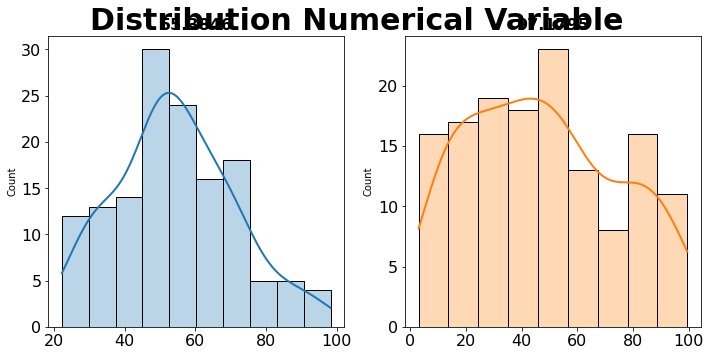

In [9]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 15, fontweight = "bold")
plt.savefig("reports/figures/Distribution_Numerical_Variable.png")

In [10]:
# Correlation between numeric columns
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

<IPython.core.display.Javascript object>

,variable_1,variable_2,r,abs_r
1,55.3846,97.1795,-0.066146,0.066146
2,97.1795,55.3846,-0.066146,0.066146


<IPython.core.display.Javascript object>

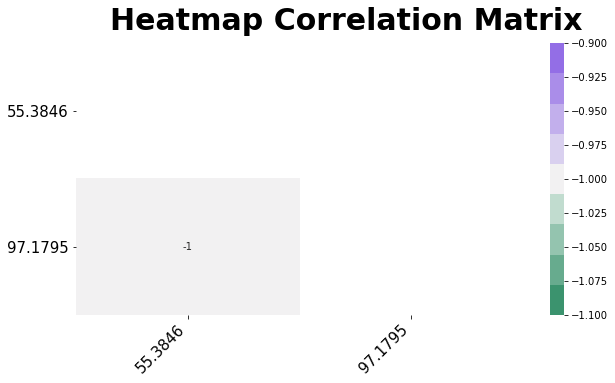

In [13]:
# Heatmap matrix of correlations
# ==============================================================================

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

corr= df.select_dtypes(include=['float64', 'int']).corr(method='pearson').corr()

# Getting the Upper Triangle of the co-relation matrix

matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, 
            annot=True, 
            mask=matrix, 
            cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
            annot_kws = {"size": 10})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 15)

fig.suptitle('Heatmap Correlation Matrix', fontsize = 30, fontweight = "bold")
plt.savefig("reports/figures/Heatmap_Matrix_Correlations.png")